# Classifying Movie Reviews
## Binary classification

## Loading the IMDB dataset
+ 25,000 reviews for training
  + 50% negative, 50% positive
+ 25,000 reviews for testing
  + 50% negative, 50% positive  

1. Loading the IMDB dataset

In [9]:
from keras.datasets import imdb
# Fixing version conflict
import numpy as np
np_load_old = np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
# num_words=10000: Only keep the top 10,000 most frequently occurring words in the training data
np.load = np_load_old

2. Encoding the integer sequences into a binary matrix

In [24]:
def vectorize_sequences(sequences, dimension=10000):
    # Creates an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        # Sets specific indices of results[i] to 1s
        results[i, sequence] = 1.
    return results 

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

# Vectorize labels 
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

# Setting aside a validation set 
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

## Building your network

1. The model definition

In [25]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_8 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


## Train the Network

In [26]:
from keras import optimizers

# optimization algorithm, learning rate, loss function, metrix
model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# batch size, number of epochs
history = model.fit(partial_x_train, partial_y_train, batch_size=512, epochs=20, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 155us/step - loss: 0.5259 - acc: 0.7739 - val_loss: 0.3977 - val_acc: 0.8568
Epoch 2/20
15000/15000 [==============================] - 1s 62us/step - loss: 0.3149 - acc: 0.8993 - val_loss: 0.3114 - val_acc: 0.8849
Epoch 3/20
15000/15000 [==============================] - 1s 64us/step - loss: 0.2307 - acc: 0.9260 - val_loss: 0.3007 - val_acc: 0.8792
Epoch 4/20
15000/15000 [==============================] - 1s 63us/step - loss: 0.1815 - acc: 0.9427 - val_loss: 0.2782 - val_acc: 0.8876
Epoch 5/20
15000/15000 [==============================] - 1s 62us/step - loss: 0.1477 - acc: 0.9545 - val_loss: 0.2772 - val_acc: 0.8874
Epoch 6/20
15000/15000 [==============================] - 1s 63us/step - loss: 0.1212 - acc: 0.9637 - val_loss: 0.3082 - val_acc: 0.8793
Epoch 7/20
15000/15000 [==============================] - 1s 62us/step - loss: 0.0990 - acc: 0.9725 - val_loss: 0.3020 - val_ac

## Examine the Results

1. Plot the training and validation loss against epochs

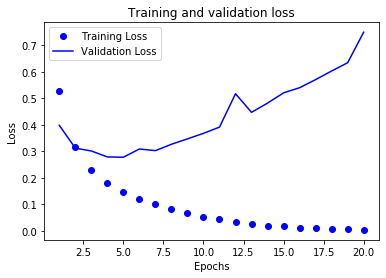

In [33]:
import matplotlib.pyplot as plt

acc = history.history['acc']
epochs = range(1, len(acc) + 1)

train_loss = history.history['loss']
valid_loss = history.history['val_loss']
plt.plot(epochs, train_loss, 'bo', label='Training Loss')
plt.plot(epochs, valid_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

2. Plot the training and validation accuracy against epochs

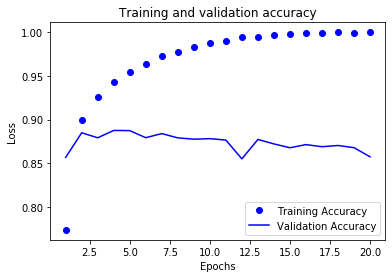

In [34]:
plt.clf()

acc = history.history['acc']
epochs = range(1, len(acc) + 1)

train_acc = history.history['acc']
valid_acc = history.history['val_acc']
plt.plot(epochs, train_acc, 'bo', label='Training Accuracy')
plt.plot(epochs, valid_acc, 'b', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

- Overfitting
  - after the second epoch, you're overoptimizing on the training data.